# Query 1: Salary inspection

In [ ]:
# Importing libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Top 10 Salaries

In [ ]:
# Read in CSV from path
df_top_10 = pd.read_csv('C:\\Users\\PCFE\\Documents\\Casey\\Developer\\SQL_PROJECT\\PostgreSQL\\Projects\\data\\1_top_10_salaries.csv')

# Inspect data
print(df_top_10)         # Shows all 10 rows
print(df_top_10.columns)        # Lists column names

In [ ]:
# Sort by salary value desending
df_top_10_sorted = df_top_10.sort_values(by='salary_year_avg', ascending=False).head(10).copy()

print(df_top_10_sorted.shape)

# Create a fake unique index for x-axis (prevents collapsing)
df_top_10_sorted['x_axis'] = [f'Job {i+1}' for i in range(len(df_top_10_sorted))]

            # due to Seaborn groups by x + hue and averages the y value if duplicates exist.

had to create a new column in the dataframe by looping through indices from 0 to 9 (for 10 rows) uses 
f-string formatting to create strings like 'Job 1..Job 10' to provide a unique placeholder label, 
as there was mergeing of the company names, due to the top 10 posting included multiple job postings from same company.
This ensured each row gets a unique label on the x-axis, which prevents Seaborn from grouping bars.

C:\Users\PCFE\AppData\Local\Temp\ipykernel_13324\2086502037.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_top_10['company_name'], rotation=45, ha='right')
C:\Users\PCFE\AppData\Local\Temp\ipykernel_13324\2086502037.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'${int(y/1000)}K' for y in ax.get_yticks()])


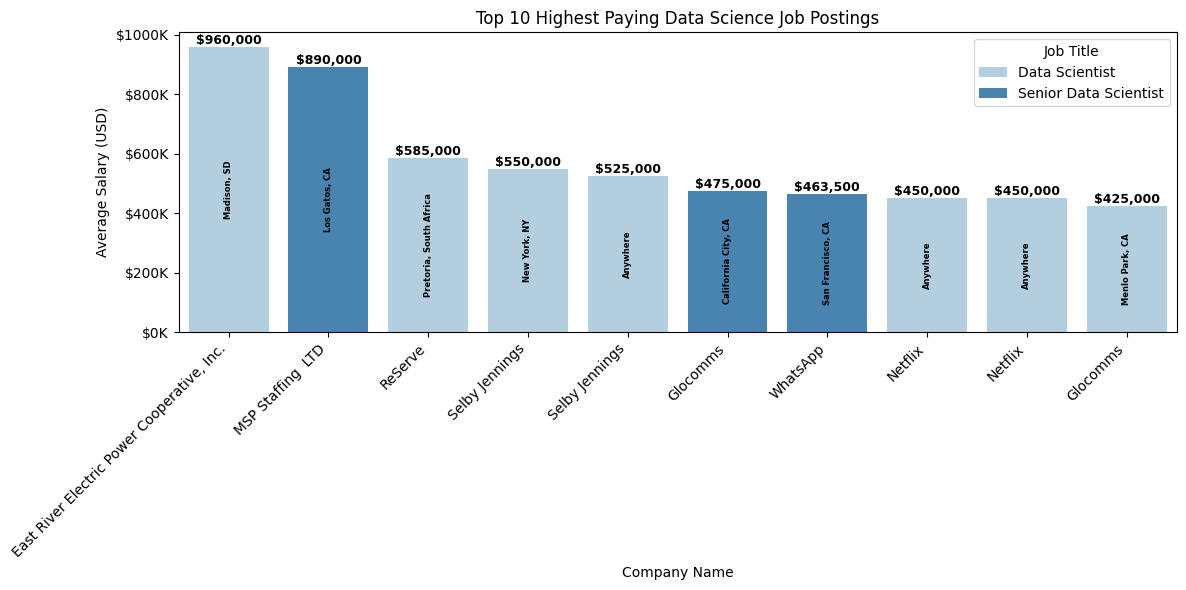

In [15]:
# obtain number of unique job titles, for colour pallet to be more informative accoridng to ranking
number_of_titles = df_top_10_sorted['job_title_short'].nunique()

# Barplot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_barplot = sns.barplot(
    data=df_top_10_sorted,
    x='x_axis',
    y='salary_year_avg',
    hue='job_title_short',
    ax=ax,
    palette= sns.color_palette("Blues", n_colors=number_of_titles)#, reverse=True)
)

# Add salary values to top of each bar
for bars in top_10_barplot.containers:
    ax.bar_label(
        bars,
        labels=[f'${int(bar.get_height()):,}' for bar in bars],  # e.g., $990,000
        label_type='edge',
        fontsize=9,
        fontweight='bold'
    )

# Fix to ensure all labels match correct bars
bars = ax.patches  # Gets all bars regardless of hue

# Add job location labels inside the center of each bar
for bar, (_, row) in zip(bars, df_top_10_sorted.iterrows()):
    location = row['job_location']
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, # centers label horizontal center of the bar
        height * 0.5,  # positioning from 10% height of bar to allow room for labels
        location, # location as text
        ha='center', # horizontal alignment = center
        va='center', # vertical alaignment =  centered around the Y-coordinate (height* 10%)
        rotation=90, # Rotates the label 90 degrees (vertical orientation).
        fontsize=6,
        color='black',
        fontweight='bold'
    )

# Replace x-axis tick labels with just the company names instead of Job1..Job10
ax.set_xticklabels(df_top_10['company_name'], rotation=45, ha='right')

# Format y-axis labels for increased readability of units
ax.set_yticklabels([f'${int(y/1000)}K' for y in ax.get_yticks()])

# Formatting
plt.title('Top 10 Highest Paying Data Science Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Average Salary (USD)')
plt.xticks(ha='right'), 
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()


In labels, using f-string formatting to provide an integer value with '$' infront to show money value
and creates a list of formatted strings for all bars in one container group.

When looping through: zip(bars, df_top_10_sorted['job_location']) — it is assumed that bars 
and df_top_10_sorted['job_location'] are in exact same order and alignment. However, when you call ax.bar(...)
and use hue='job_title_short', Seaborn actually creates grouped bars and manages them as multiple sets, 
so the bars list only includes one bar per hue group. This meant zip(bars, df_top_10_sorted['job_location']) 
 may only loop through a subset of all rows, usually just the second hue category 
 (in this case "Senior Data Scientist"), so only their locations were drawn. Zip was aimed to pair the bars and the job
 title together.

 To attend to this issue, paired together each bar from the chart (ax.patches) and the corresponding data row 
 from sorted dataframe (df_top_10_sorted.iterrows()), so that the bar's height and x-position to place text and
 use the row's corresponding 'job_location' as the content of the label. 


## Salary by Seniority

In [19]:
# Read in CSV from path
df_seniority = pd.read_csv('C:\\Users\\PCFE\\Documents\\Casey\\Developer\\SQL_PROJECT\\PostgreSQL\\Projects\\data\\1_salary_by_seniority.csv')

# Inspect data
df_seniority         # Shows all 10 rows

,job_title_short,min_salary,max_salary,median_salary,average_salary,number_positions
0,Data Scientist,27000.0,960000.0,127500,135929.5,5926
1,Senior Data Scientist,45000.0,890000.0,155000,154050.0,1686


In [ ]:
# Code- stacked barplot 